# Analise de massas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv

Primeiramente, vamos exportar os dados do csv.

In [2]:
with open('massas.csv', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    ids = next(reader)[1:]  # pega o nome dos itens no cabeçalho, pulando a primera palavra
    matriz = np.array([[float(i) for i in row] for row in reader])
    # cria uma matriz com os valores do csv
    # fatiamento da matriz:
    tempos = matriz[0:, 0]
    massas = matriz[0:, 1:]

array([[1.4482, 1.4382, 1.4464, 1.4234, 1.4423, 1.4548, 1.4516, 1.434 ,
        1.4531, 1.4603, 1.439 , 1.4501, 1.4432, 1.4583, 1.4604],
       [1.4482, 1.4382, 1.4464, 1.4285, 1.442 , 1.4617, 1.4516, 1.434 ,
        1.4531, 1.4706, 1.4487, 1.4602, 1.4432, 1.4583, 1.4604],
       [1.4543, 1.4434, 1.4522, 1.427 , 1.4464, 1.4581, 1.4584, 1.4605,
        1.4448, 1.4663, 1.4441, 1.4562, 1.4488, 1.4563, 1.4658],
       [1.4482, 1.4382, 1.4464, 1.4285, 1.442 , 1.4617, 1.4516, 1.434 ,
        1.4531, 1.4706, 1.4487, 1.4602, 1.4432, 1.4583, 1.4604],
       [1.435 , 1.3409, 1.4464, 1.4321, 1.4506, 1.4655, 1.4516, 1.434 ,
        1.4531, 1.4673, 1.4445, 1.458 , 1.4605, 1.4951, 1.479 ]])

Agora, vamos calcular as médias e margens de erro de cada medição para cada experimento. erros associados a medidadas de massa na balança de precisão utilizada são de $\pm 0,0001$. O método de propagação do erro foi de $\sigma_f = \sqrt{\sigma^2 + \frac{s^2}{N}}$, onde $\sigma_f$ corresponde a margem de erro final, $\sigma$ ao desvio padrão das $N = 3$ amostras e $s$ o erro associado com cada medida.

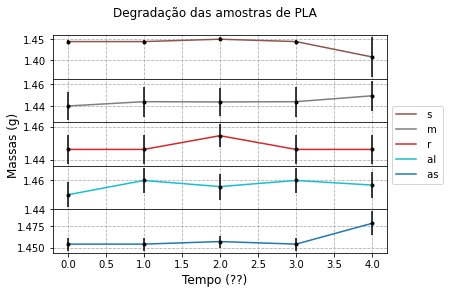

In [3]:
cores = ['tab:brown', 'tab:gray', 'tab:red', 'tab:cyan', 'tab:blue']

fig = plt.figure()
gs = fig.add_gridspec(len(ids)//3, hspace=0)
axs = gs.subplots(sharex='col')  #, sharey='col)
fig.suptitle('Degradação das amostras de PLA')
fig.supxlabel('Tempo (??)')
fig.supylabel('Massas (g)')

for val in range(0, len(ids), 3):
    exp = np.split(massas, len(ids), 1)[val:val+3]

    means = np.mean(exp, axis=0).reshape(len(tempos))
    std = np.sqrt(np.std(exp, axis=0).reshape(len(tempos)) ** 2 + 0.0001 ** 2 / 3)

    i = val//3
    axs[i].plot(tempos, means, color=cores[i], label=ids[val][:-1])
    axs[i].errorbar(tempos, means, yerr=std, fmt='.k')
    axs[i].grid(linestyle='--')

fig.legend(loc='center left', bbox_to_anchor=(.9,0.5))


## Determinação dos coeficeintes de correlação:

Os coeficientes de correlação estão sendo determinados pela média das 3 amostras de um experimento.

In [4]:
coefs = []
amostras = np.split(massas, len(ids), 1)
for val in range(0, len(ids), 3):
    coefs.append(np.corrcoef(tempos, np.reshape(np.mean(amostras[val:val+3], axis=0), len(tempos)))[0, 1])

Vizualização dos coeficientes:

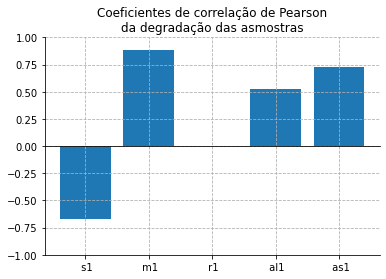

In [12]:
_, ax = plt.subplots()
plt.bar(ids[0::3], coefs)
plt.title('Coeficientes de correlação de Pearson\nda degradação das asmostras')
plt.ylim((-1,1))
ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')
plt.grid(linestyle='--')